# Module 9: Estimation

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as ss

%matplotlib inline 

## Kernel density estimation

Btw, here are some resources on KDE: http://yyahnwiki.appspot.com/Kernel%20density%20estimation Feel free to check out if you want to learn more about KDE. 

Let's import the IMDb data.

In [4]:
import vega_datasets

movies = vega_datasets.data.movies()
movies.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


**Q: Can you drop rows that have NaN value in either `IMDB_Rating` or `Rotten_Tomatoes_Rating`?**

In [5]:
# TODO
movies.dropna(subset=['IMDB_Rating','Rotten_Tomatoes_Rating'],inplace=True)
print(sum(movies.IMDB_Rating.isna()),sum(movies.Rotten_Tomatoes_Rating.isna()))

0 0


We can plot histogram and KDE using pandas:

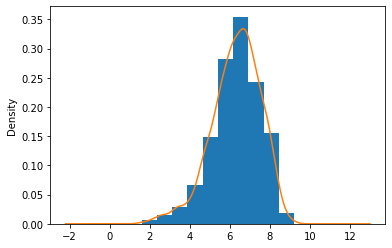

In [6]:
movies['IMDB_Rating'].hist(bins=10, density=True)
movies['IMDB_Rating'].plot(kind='kde')

Or using seaborn:

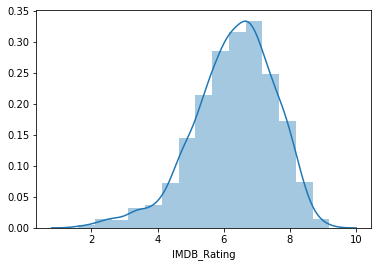

In [7]:
sns.distplot(movies['IMDB_Rating'], bins=15)

**Q: Can you plot the histogram and KDE of the `Rotten_Tomatoes_Rating`?**

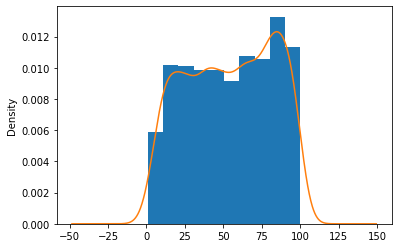

In [8]:
# TODO: implement this using pandas
movies['Rotten_Tomatoes_Rating'].hist(bins=10, density=True)
movies['Rotten_Tomatoes_Rating'].plot(kind='kde')

We can get a random sample using the pandas' [**`sample()`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) function. The [**`kdeplot()`**](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html) function in seaborn provides many options (like kernel types) to do KDE. Let's sample some data points and see how does KDE plot changes with the size of the samples. 

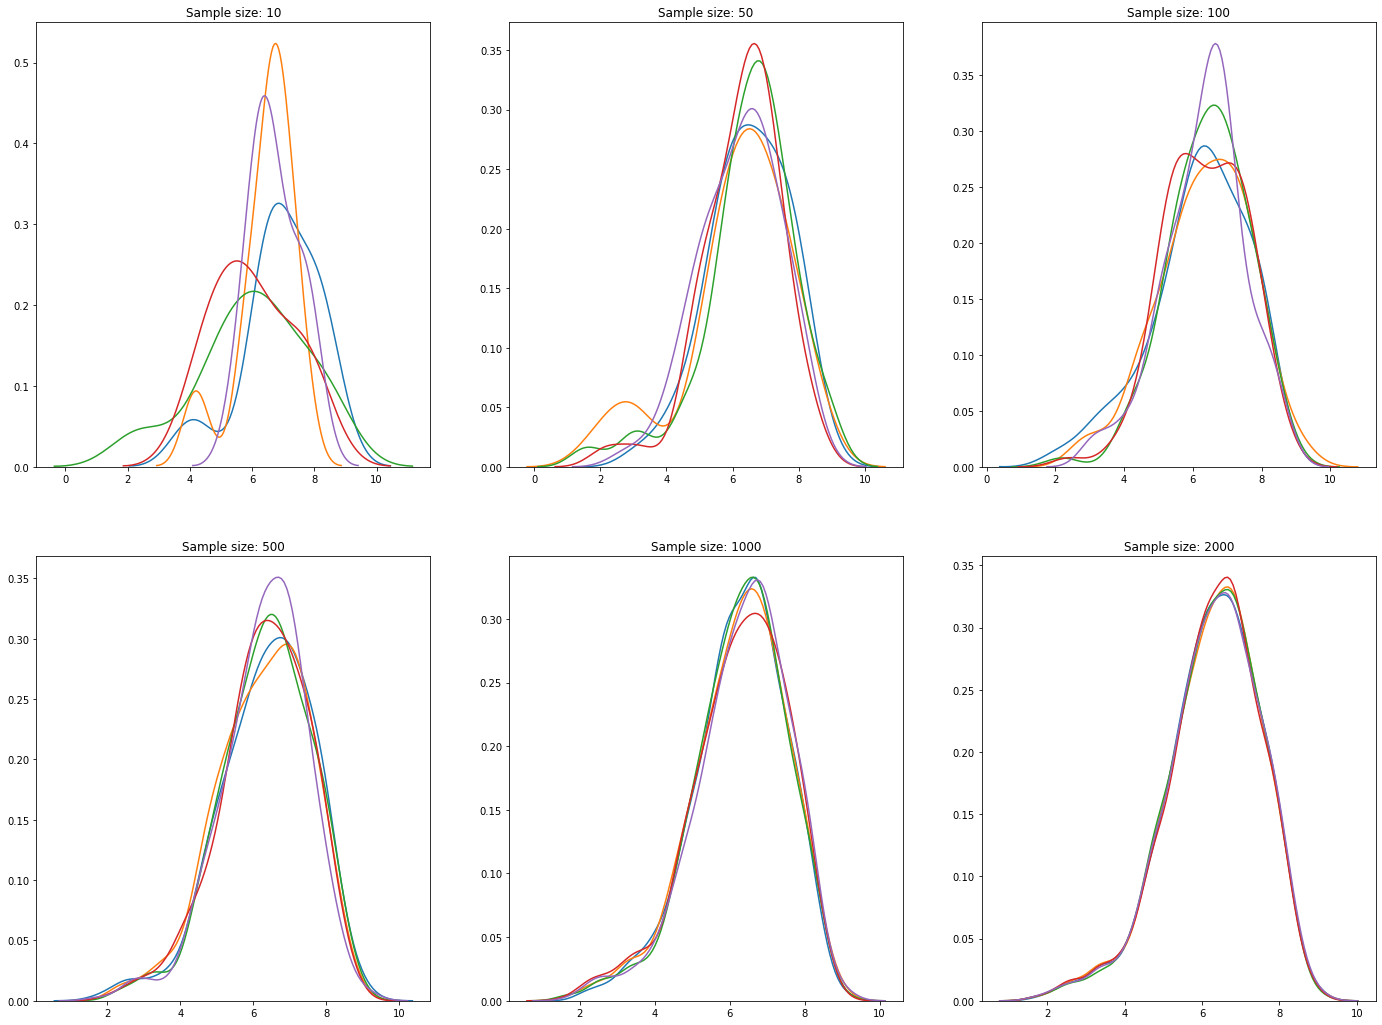

In [9]:
f = plt.figure(figsize=(24,18))
plt.xlim(0, 10)

sample_sizes = [10, 50, 100, 500, 1000, 2000]
for i, N in enumerate(sample_sizes, 1):
    plt.subplot(2,3,i)
    plt.title("Sample size: {}".format(N))
    for j in range(5):
        s = movies['IMDB_Rating'].sample(N)
        sns.kdeplot(s, kernel='gau', legend=False)

Let's try all kernel types supported by seaborn's `kdeplot()`. Plot the same 2x3 grid with all kernels: https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot To see how do the kernels look like, just sample 2 data points and plot them. 

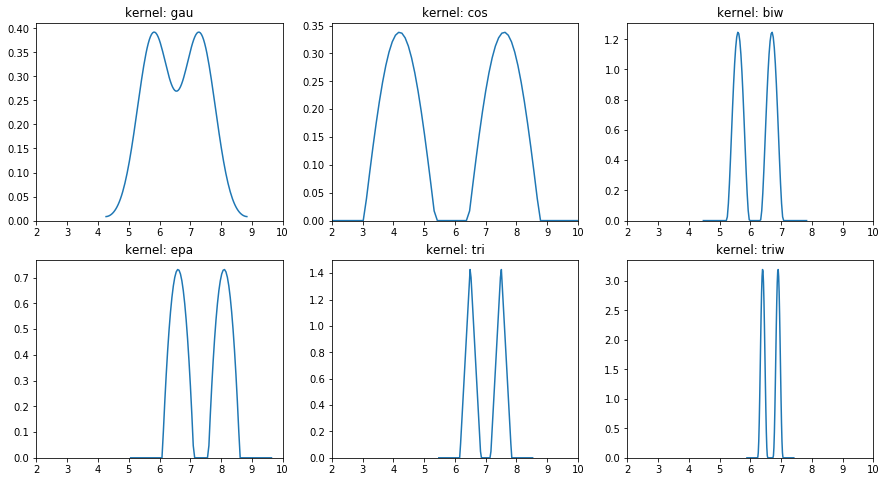

In [39]:
# Implement here
f=plt.figure(figsize=(15,8))
plt.xlim(0,10)
kernel_type=['gau','cos','biw','epa','tri','triw']
for i, T in enumerate (kernel_type,1):
  plt.subplot(2,3,i)
  plt.title("kernel: {}".format(T))
  sns.kdeplot(movies['IMDB_Rating'].sample(2),kernel=T,legend=False)
  plt.xlim(2,10)

**Q: We can also play with the bandwidth option. Make sure to set the `xlim` so that all plots have the same x range, so that we can compare. **

<Figure size 1080x576 with 0 Axes>

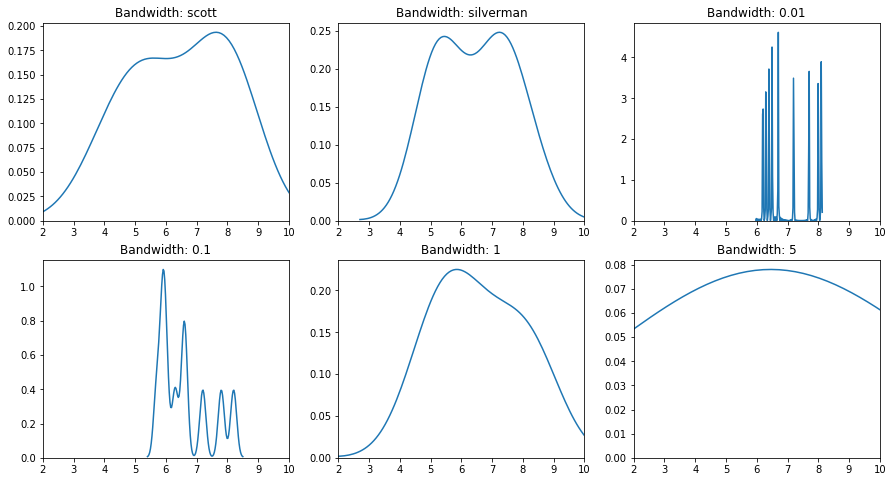

In [42]:
f = plt.figure(figsize=(15,8))
bw = ['scott', 'silverman', 0.01, 0.1, 1, 5]
kernel = 'gau'
# Implement here
f=plt.figure(figsize=(15,8))
bw=['scott','silverman',0.01,0.1,1,5]
kernel='gau'
for i, B in enumerate (bw,1):
  plt.subplot(2,3,i)
  plt.title("Bandwidth: {}".format(B))
  sns.kdeplot(movies['IMDB_Rating'].sample(10),bw=B,legend=False)
  plt.xlim([2,10])

**Q: What's your takeaway? Explain how bandwidth affects the result of your visualization. **

The take away is to always try different bandwidth types.

## Interpolation

One area where interpolation is used a lot is image processing. Play with it!

https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html

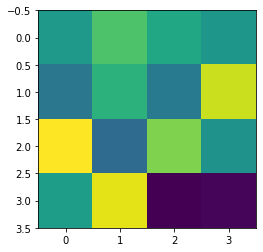

In [11]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
np.random.seed(0)
grid = np.random.rand(4, 4)

plt.imshow(grid, interpolation=None, cmap='viridis')

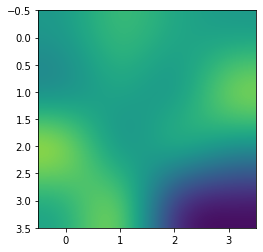

In [12]:
plt.imshow(grid, interpolation='bicubic', cmap='viridis')

Let's look at some time series data. 

In [13]:
co2 = vega_datasets.data.co2_concentration()
co2.head()

,Date,CO2
0,1958-03-01,315.70
1,1958-04-01,317.46
2,1958-05-01,317.51
3,1958-07-01,315.86
4,1958-08-01,314.93


In [14]:
co2.Date.dtype

dtype('O')

The `Date` colume is stored as strings. Let's convert it to `datetime` so that we can manipulate. 

In [15]:
pd.to_datetime(co2.Date).head()

0   1958-03-01
1   1958-04-01
2   1958-05-01
3   1958-07-01
4   1958-08-01
Name: Date, dtype: datetime64[ns]

In [16]:
co2.Date = pd.to_datetime(co2.Date)

In [17]:
co2.set_index('Date', inplace=True)
co2.head()

,CO2
Date,
1958-03-01,315.70
1958-04-01,317.46
1958-05-01,317.51
1958-07-01,315.86
1958-08-01,314.93


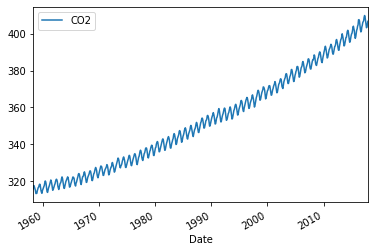

In [18]:
co2.plot()

😢

In [19]:
recent_co2 = co2.tail(8)

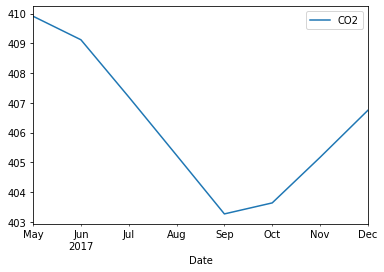

In [20]:
recent_co2.plot()

This standard line chart above can be considered as a chart with linear interpolation between data points. 

The data contains measurements at the resolution of about a month. Let's up-sample the data. This process create new rows that fill the gap between data points. We can use `interpolate()` function to fill the gaps. 

In [21]:
upsampled = recent_co2.resample('D')
upsampled.interpolate().head()

,CO2
Date,
2017-05-01,409.910000
2017-05-02,409.884516
2017-05-03,409.859032
2017-05-04,409.833548
2017-05-05,409.808065


If we do `linear` interpolation, we get more or less the same plot, but just with more points. 

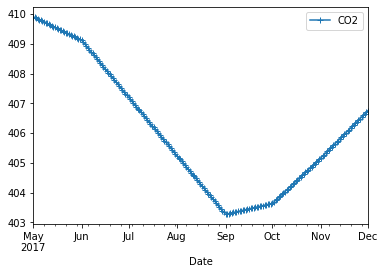

In [22]:
recent_co2.resample('D').interpolate(method='linear').plot(style='+-')

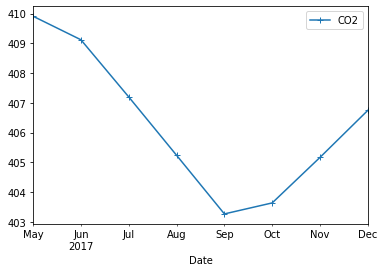

In [23]:
recent_co2.plot(style='+-')

`Nearest` interpolation is just a process of assigning the nearest value to each missing rows. 

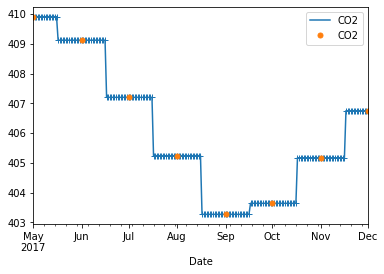

In [24]:
ax = recent_co2.resample('D').interpolate(method='nearest').plot(style='+-')
recent_co2.plot(ax=ax, style='o', ms=5)

Let's try a spline too. 

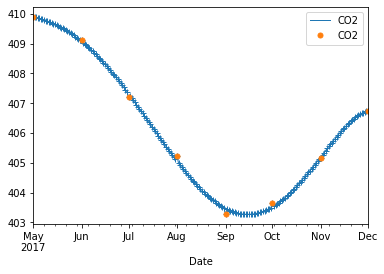

In [25]:
ax = recent_co2.resample('D').interpolate(method='spline', order=5).plot(style='+-', lw=1)
recent_co2.plot(ax=ax, style='o', ms=5)

## Moving average

Pandas has a nice method called `rolling()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html

It lets you do operations on the `rolling` windows. For instance, if you want to calculate the moving average, you can simply

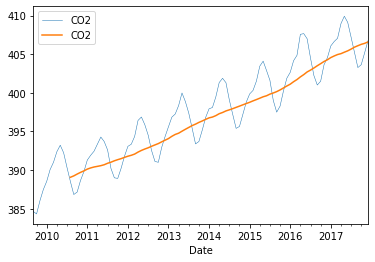

In [26]:
ax = co2[-100:].plot(lw=0.5)
co2[-100:].rolling(12).mean().plot(ax=ax)

By default, it consider every data point inside each window equally (`win_type=None`) but there are many window types supported by `scipy`. Also by default, the mean value is put at the right end of the window (trailing average).  

**Q: can you create a plot with `triang` window type and centered average? **

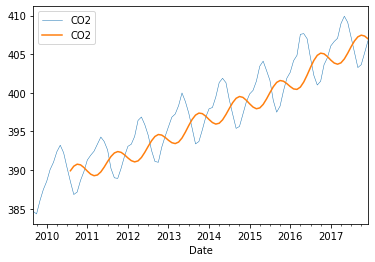

In [43]:
# Implement here
ax = co2[-100:].plot(lw=0.5)
co2[-100:].rolling(12,win_type='triang').mean().plot(ax=ax)

## Examining relationsips

Remember [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)? Actually, the dataset is not only included in `vega_datasets` but also in `seaborn`. 


In [28]:
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


All four datasets are in this single data frame and the 'dataset' indicator is one of the columns. This is a form often called [tidy data](http://vita.had.co.nz/papers/tidy-data.pdf), which is easy to manipulate and plot. In tidy data, each row is an observation and columns are the properties of the observation. Seaborn makes use of the tidy form. Using seaborn's `lmplot`, you can very quickly examine relationships between variables, separated by some facets of the dataset. 

**Q: Can you produce the plot below using `lmplot()`?**

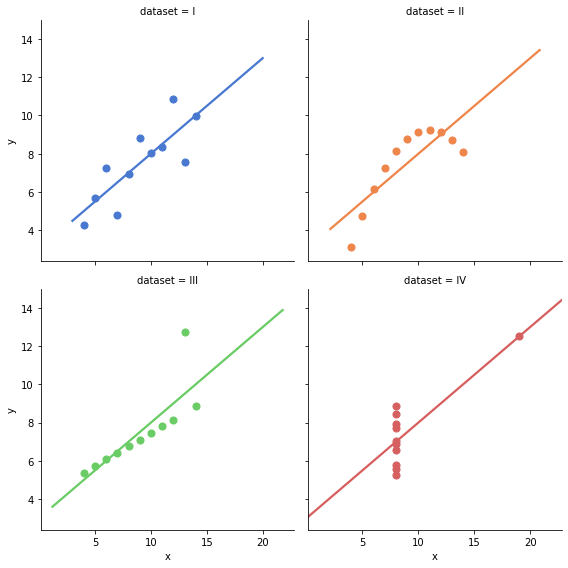

In [44]:
# plotting parameters you can use
palette = "muted"
scatter_kws={"s": 50, "alpha": 1}
ci=None
height=4

# Implement
sns.lmplot(x='x',y='y',col='dataset', hue='dataset',
           data=df,
           palette='muted',
           scatter_kws={'s':50,'alpha':1},
           ci=None, height=4,
           col_wrap=2)

**Q: So let's look at the relationship between `IMDB_Rating` and `Rotten_Tomatoes_Rating` in the `movies` dataset, separated with respect to `MPAA_Rating`. Put 4 plots in a row. **

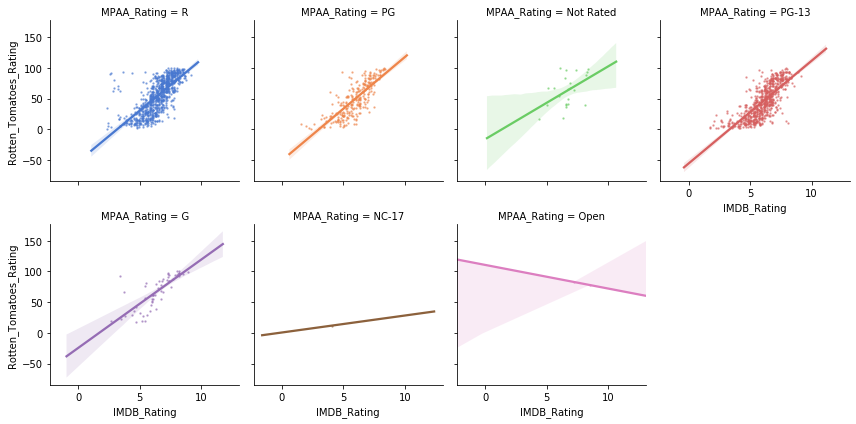

In [45]:
# Implement
sns.lmplot(x='IMDB_Rating',y='Rotten_Tomatoes_Rating',
           col='MPAA_Rating', hue='MPAA_Rating',
           palette='muted',
           scatter_kws={'s':2,'alpha':0.5},
           height=3,data=movies,
           col_wrap=4)

It may be interesting to dig up what are the movies that have super high Rotten Tomatoes rating and super low IMDB rating (and vice versa)!

Another useful method for examining relationships is [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html), which produces a scatter plot with two marginal histograms. 

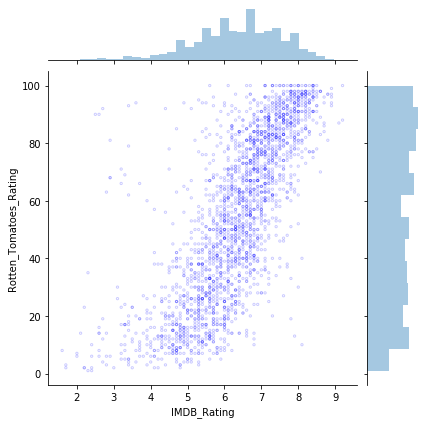

In [31]:
g = sns.jointplot(movies['IMDB_Rating'], movies['Rotten_Tomatoes_Rating'], s=5, alpha=0.2, facecolors='none', edgecolors='b')

## Hexbin density plot

In 2D, *heatmap* can be considered as a color-based histogram. You divide the space into bins and show the frequency with colors. A common binning method is the hexagonal bin. 

We can again use the [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) and setting the `kind` to be `hexbin`. 

**Q: Can you create one?**

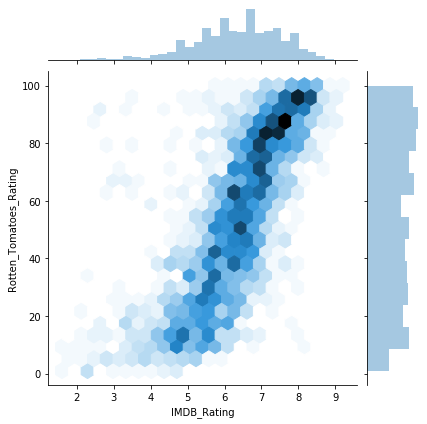

In [46]:
# implement
sns.jointplot(movies['IMDB_Rating'],movies['Rotten_Tomatoes_Rating'],kind='hex')

## 2D KDE

We can also do 2D KDE using seaborn's [**`kdeplot()`**](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html) function. 

**Q: Can you draw one like this?**

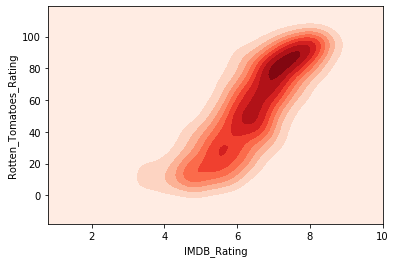

In [47]:
cmap = "Reds"
shade = True         # what happens if you change this?
shade_lowest = True  # what happens if you change this?

# implement 
sns.kdeplot(movies['IMDB_Rating'],movies['Rotten_Tomatoes_Rating'],shade=True,cmap='Reds',
           shade_lowest=True)

Or again using [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) by setting the `kind` parameter. Look, we also have the 1D marginal KDE plots!

**Q: create jointplot with KDE**

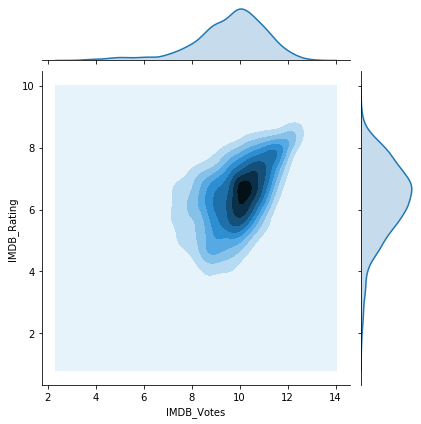

In [48]:
# Implement: draw a joint plot with bivariate KDE as well as marginal distributions with KDE
sns.jointplot(np.log(movies.IMDB_Votes),movies['IMDB_Rating'],kind='kde')